In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from datetime import datetime

import feather


## Loading and preparing the data

In [29]:
# stop_events = pd.read_csv("../data_files/B/once/75days/stop_events_with_geo_train_test_averages.feather")

stop_events = feather.read_dataframe("../../data_files/B/once/75days/stop_events_with_geo_train_test_averages_prev_next_dwell.feather",
                            columns=["index",
                                     "segment_duration",
                                     'line_distance',
                                     'to_centre_dist',
                                     'direction_degrees',
                                     'rain',
                                     'arrival_hour','arrival_day',
                                     'date','workid',
                                     'actualArrival',
                                     'publicName',
                                     'segment_name',
                                     'dwell_duration_dest',
                                      'dwell_duration_prev',
                                     'timingPoint',
                                     'timetable_segment_duration',
                                     'segment_code',
                                     'mean_durations_by_segement_code_and_hour_and_day',
                                     'median_durations_by_segment_code',
                                     'clock_direction_degrees'
                                    ])


stop_events = stop_events.set_index("index")
stop_events.head()



,date,actualArrival,workid,publicName,timingPoint,segment_code,segment_name,line_distance,to_centre_dist,direction_degrees,rain,dwell_duration_dest,dwell_duration_prev,segment_duration,timetable_segment_duration,arrival_hour,arrival_day,median_durations_by_segment_code,clock_direction_degrees
index,,,,,,,,,,,,,,,,,,,
0,2018-09-18,2018-09-18 07:02:25,167_101_1,1a,0,1200BOB20158_1200BOB20156_0,1200BOB20158_1200BOB20156,0.217418,9.745283,-74.864681,0.0,5.0,5.0,17.0,60.0,7,1,17.0,166.467125
1,2018-09-18,2018-09-18 07:02:48,167_101_1,1a,0,1200BOB20156_1200BOB20155_0,1200BOB20156_1200BOB20155,0.245692,9.526394,-67.975542,0.0,5.0,5.0,18.0,60.0,7,1,18.0,166.907431
2,2018-09-18,2018-09-18 07:03:11,167_101_1,1a,0,1200BOB20155_1200BOB20153_0,1200BOB20155_1200BOB20153,0.235304,9.302113,-69.808648,0.0,5.0,5.0,18.0,60.0,7,1,20.0,167.432808
3,2018-09-18,2018-09-18 07:03:58,167_101_1,1a,0,1200BOB20153_1200BOB20151_0,1200BOB20153_1200BOB20151,0.484816,8.953191,-79.678762,0.0,53.0,5.0,42.0,120.0,7,1,47.0,167.953018
4,2018-09-18,2018-09-18 07:05:34,167_101_1,1a,0,1200BOB20151_1200BOB20148_0,1200BOB20151_1200BOB20148,0.377756,8.527955,-81.507908,0.0,5.0,53.0,43.0,60.0,7,1,59.0,168.050564


In [30]:
stop_events.head(30)

print(stop_events.shape)

stop_events = stop_events.dropna(subset=['arrival_hour', 'to_centre_dist','segment_duration'], axis=0)

# # stop_events = stop_events[stop_events.id != "NaN"]

print(stop_events.shape)

(3920087, 19)
(3920087, 19)


In [31]:
stop_events = stop_events[(stop_events['arrival_hour'] > 4) | (stop_events['arrival_hour'] == 0)]

In [49]:
stop_events['speed'] = stop_events['line_distance'] *1000 / stop_events['segment_duration'] * 2.23694
stop_events['speed'] = stop_events['speed'].replace(np.inf, np.nan)

In [50]:
by_hour_and_distance = stop_events.groupby(['arrival_hour', pd.cut(stop_events['to_centre_dist'], np.linspace(0,10,11))])['speed'].mean()


In [51]:
by_hour_and_distance = by_hour_and_distance.reset_index()
by_hour_and_distance.columns = ['hour', 'distance', 'mean speed']
by_hour_and_distance=by_hour_and_distance.pivot('hour', 'distance')

In [52]:
by_hour_and_distance.head(20)

mean speed                                                         \
distance (0.0, 1.0] (1.0, 2.0] (2.0, 3.0] (3.0, 4.0] (4.0, 5.0] (5.0, 6.0]   
hour                                                                         
0         17.361200  22.568722  20.893255  23.230976  22.181886  24.107926   
5         15.983394  20.958144  24.213945  24.042364  21.410590  22.465651   
6         17.113404  21.481184  19.649447  21.686937  20.515860  21.849787   
7         16.300018  21.115802  17.594448  19.354558  19.195859  20.849386   
8         16.007749  20.100924  15.706563  16.787988  18.141560  20.287658   
9         15.837033  20.759211  16.667937  18.665522  19.257962  20.693617   
10        15.297797  20.422839  16.760874  18.599450  18.904791  20.812594   
11        15.156280  20.216882  16.297285  18.324518  18.712468  20.497908   
12        14.953084  19.854006  16.159261  18.287730  18.636991  20.792001   
13        14.956308  19.744058  15.955237  18.386931  18.906039  20.795994   
14        14.567059  19.804544  16.053593  17.974976  18.582775  20.759680   
15        14.455403  19.718653  15.418273  16.700139  17.943579  20.269935   
16        14.196100  19.151225  15.283560  17.061288  18.403344  20.540681   
17        13.742813  18.529453  15.138390  17.408463  18.304065  20.510405   
18        14.487702  19.327084  16.414428  18.493346  18.845930  20.947871   
19        14.728404  20.278925  17.422149  19.598933  19.509113  21.276718   
20        16.531428  21.395272  18.917306  21.445235  20.267960  22.697330   
21        16.829002  21.486954  19.483795  22.001756  21.178523  22.929220   
22        17.019631  21.430902  19.586543  22.157320  21.315590  23.046812   
23        17.248192  22.231840  20.486271  22.634845  21.635692  23.690049   

                                                       
distance (6.0, 7.0] (7.0, 8.0] (8.0, 9.0] (9.0, 10.0]  
hour                                                   
0         24.003515  19.229323  19.713699   30.356563  
5         24.378146  18.332789  21.991446   29.943973  
6         23.945417  16.542009  18.819654   22.730451  
7         21.315424  15.618562  16.869023   22.652250  
8         19.031858  13.487054  15.607653   23.985152  
9         20.701078  13.806739  15.882814   25.067170  
10        21.030828  13.517871  15.222166   23.168743  
11        20.693724  12.850705  14.808918   23.291068  
12        20.781757  12.902788  14.919010   22.537242  
13        20.919537  13.413486  15.369551   23.399478  
14        20.848053  13.231926  15.508370   23.745634  
15        19.378573  12.579920  15.080816   23.665088  
16        19.443254  12.617695  14.427558   21.702097  
17        19.572212  12.668681  14.129487   21.814766  
18        20.651733  14.139539  15.513517   24.020478  
19        21.674010  14.636075  16.763791   28.660840  
20        22.681967  15.867371  17.896687   28.941502  
21        23.034496  16.395133  17.731049   29.834827  
22        23.866671  16.803680  18.136615   28.681467  
23        24.116861  18.040994  18.809842   31.012894

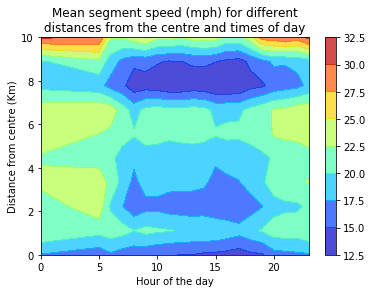

In [55]:
X=np.linspace(0,10,10)
Y=by_hour_and_distance.index.values.astype(float)
Z=by_hour_and_distance.values
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Distance from centre (Km)")
plt.xlabel("Hour of the day")
plt.colorbar()
plt.title("Mean segment speed (mph) for different\ndistances from the centre and times of day");
plt.savefig("EDA_contour_speed against dist and hour.pdf")

In [57]:
stop_events['diff_in_jd_from_median_by_segement'] = stop_events['segment_duration'] - stop_events['median_durations_by_segment_code']


In [58]:
mean_diff_from_median_by_hour_and_distance = stop_events.groupby(['arrival_hour', pd.cut(stop_events['to_centre_dist'], np.linspace(0,10,11))])['diff_in_jd_from_median_by_segement'].mean()


In [59]:
mean_diff_from_median_by_hour_and_distance = mean_diff_from_median_by_hour_and_distance.reset_index()
mean_diff_from_median_by_hour_and_distance.columns = ['hour', 'distance', 'diff from median']
mean_diff_from_median_by_hour_and_distance=mean_diff_from_median_by_hour_and_distance.pivot('hour', 'distance')

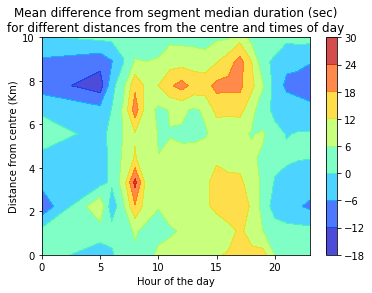

In [60]:
X=np.linspace(0,10,10)
Y=mean_diff_from_median_by_hour_and_distance.index.values.astype(float)
Z=mean_diff_from_median_by_hour_and_distance.values
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Distance from centre (Km)")
plt.xlabel("Hour of the day")
plt.colorbar()
plt.title("Mean difference from segment median duration (sec)\nfor different distances from the centre and times of day");
# plt.savefig("Mean diff from median against dist and hour.png", dpi=400)
plt.savefig("EDA_contour_diff from median against dist and hour.pdf")

In [61]:
mean_diff_from_median_by_hour_and_distance = stop_events.groupby(['arrival_hour', pd.cut(stop_events['direction_degrees'], np.linspace(-90,90,11))])['diff_in_jd_from_median_by_segement'].mean()


In [62]:
mean_diff_from_median_by_hour_and_distance = mean_diff_from_median_by_hour_and_distance.reset_index()
mean_diff_from_median_by_hour_and_distance.columns = ['hour', 'direction', 'diff from median']
mean_diff_from_median_by_hour_and_distance=mean_diff_from_median_by_hour_and_distance.pivot('hour', 'direction')

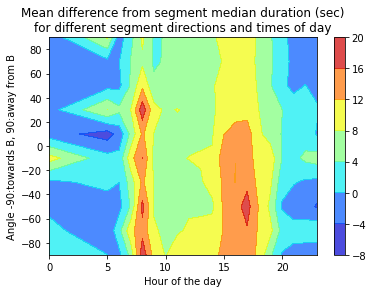

In [63]:
X=np.linspace(-90,90,10)
Y=mean_diff_from_median_by_hour_and_distance.index.values.astype(float)
Z=mean_diff_from_median_by_hour_and_distance.values
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Angle -90:towards B, 90:away from B")
plt.xlabel("Hour of the day")
plt.colorbar()
plt.title("Mean difference from segment median duration (sec)\nfor different segment directions and times of day");
# plt.savefig("Mean diff from median against segment angle and hour.png", dpi=400)
plt.savefig("EDA_contour_mean diff from median against segment angle and hour.pdf")

In [64]:
mean_diff_from_median_by_hour_and_distance = stop_events.groupby(['arrival_hour', pd.cut(stop_events['clock_direction_degrees'], np.linspace(0,180,11))])['diff_in_jd_from_median_by_segement'].mean()


In [65]:
mean_diff_from_median_by_hour_and_distance = mean_diff_from_median_by_hour_and_distance.reset_index()
mean_diff_from_median_by_hour_and_distance.columns = ['hour', 'direction', 'diff from median']
mean_diff_from_median_by_hour_and_distance=mean_diff_from_median_by_hour_and_distance.pivot('hour', 'direction')

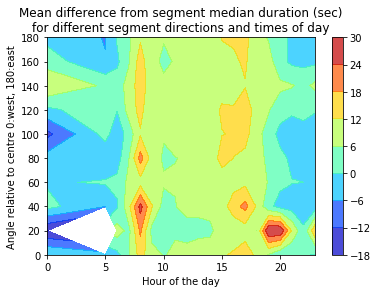

In [67]:
X=np.linspace(0,180,10)
Y=mean_diff_from_median_by_hour_and_distance.index.values.astype(float)
Z=np.clip(mean_diff_from_median_by_hour_and_distance.values, -30, 30)
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Angle relative to centre 0:west, 180:east")
plt.xlabel("Hour of the day")
plt.colorbar()
plt.title("Mean difference from segment median duration (sec)\nfor different segment directions and times of day");
# plt.savefig("Mean diff from median against segment angle to B and hour.png", dpi=400)
plt.savefig("EDA_contour_Mean diff from median against segment angle to B and hour.pdf")


In [47]:
stop_events['clock_direction_degrees'].max()

179.80407279133112

In [48]:
stop_events.columns

Index(['date', 'actualArrival', 'workid', 'publicName', 'timingPoint',
       'segment_code', 'segment_name', 'line_distance', 'to_centre_dist',
       'direction_degrees', 'rain', 'dwell_duration_dest',
       'dwell_duration_prev', 'segment_duration', 'timetable_segment_duration',
       'arrival_hour', 'arrival_day', 'median_durations_by_segment_code',
       'clock_direction_degrees', 'speed',
       'diff_in_jd_from_median_by_segement'],
      dtype='object')